In [98]:
#Задача 1

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit

beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1

xdata = np.linspace(1, 3, 25)
y = f(xdata, *beta)

ydata = y + 0.1 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev =  sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

[0.97121392 2.03165813]
-3.398377832942453e-05
0.26819710590089846


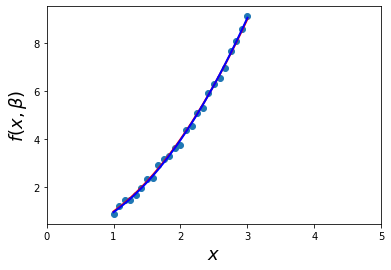

In [99]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

(30, 2)


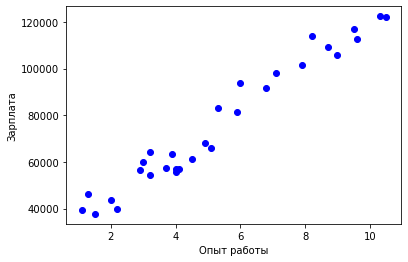

26780.099150628186
[9312.57512673]
     Actual      Predicted
0   37731.0   40748.961841
1  122391.0  122699.622956
2   57081.0   64961.657170
3   63218.0   63099.142145
4  116969.0  115249.562855
5  109431.0  107799.502753


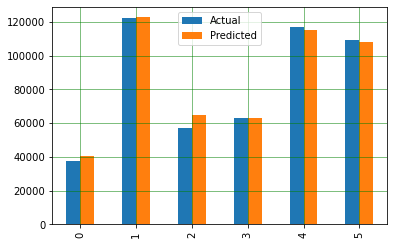

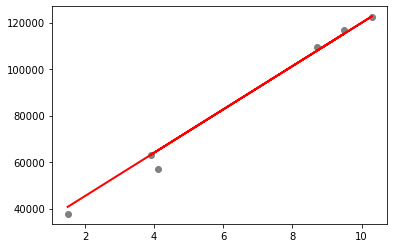

In [100]:
#Задача 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)
dataset.head()

print(dataset.shape)
dataset.describe()

plt.scatter (dataset['YearsExperience'], dataset['Salary'], color = 'b', label = "Заработная плата")
plt.xlabel("Опыт работы")
plt.ylabel("Зарплата")
plt.show()




X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression() 
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [101]:
#Задача 3

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Качество красного вина
dataset = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [102]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [103]:
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
y = dataset['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) 
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [104]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
...,...,...
794,6,6.559757
813,4,6.017576
1322,5,6.251291
704,4,5.163926


In [105]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.3844711978201257


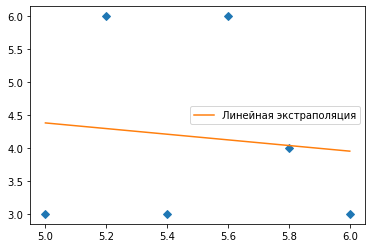

Коэффициенты:  -0.429 6.524
Исходные y: 3.0 6.0 3.0 6.0 4.0 3.0
Полученные y:  4.381 4.295 4.21 4.124 4.038 3.952
MSE:  1.784126984126984


In [116]:
#Задача 4

#Вариант 15 (5)
X = np.array([5.0, 5.2, 5.4, 5.6, 5.8, 6.0])
Y = np.array([3.0, 6.0, 3.0, 6.0, 4.0, 3.0])

#1-я степень (y=kx+b=sA)
A = np.vstack([X, np.ones(len(X))]).T #A = [[x, 1]]
s = np.linalg.lstsq(A, Y, rcond=None)[0] #s = [k, b]

plt.plot(X, Y, "D")
plt.plot(X, s[0] * X + s[1], label='Линейная экстраполяция')
plt.legend()
plt.show()

print("Коэффициенты: ", *s.round(3))
print("Исходные y:", *Y)
print("Полученные y: ", *(s[0] * X + s[1]).round(3))
print("MSE: ", metrics.mean_squared_error(Y, s[0] * X + s[1]))

Коэффициенты:  -7.143 78.143 -208.714
Исходные y: 3.0 6.0 3.0 6.0 4.0 3.0
Полученные y:  3.429 4.486 4.971 4.886 4.229 3.0
MSE:  1.276190476190486


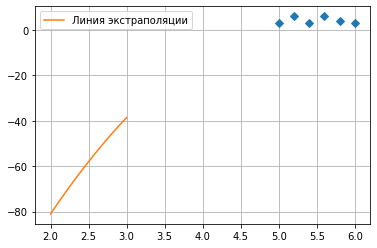

In [117]:
#2-я степень

#y = a2*x^2 + a1*x + a0 = sA

A = np.vstack([X**2, X, np.ones(len(X))]).T #A = [[x^2, x, 1]]
s = np.linalg.lstsq(A, Y, rcond=None)[0] #s = [a, b, c]

# на отрезке [2, 3]
x_prec = np.linspace(2, 3, 101)

plt.plot(X, Y, "D")
plt.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec + s[2], label='Линия экстраполяции')
plt.legend()
plt.grid()

print("Коэффициенты: ", *s.round(3))
print("Исходные y:", *Y)
print("Полученные y: ", *(s[0] * X**2 + s[1] * X + s[2]).round(3))
print("MSE: ", metrics.mean_squared_error(Y, s[0] * X**2 + s[1] * X + s[2]))